In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision

In [2]:
df = pd.read_csv('Cleaned_data.csv')

In [3]:
df.head()

,date,state,fips,cases,daily_cases,deaths,daily_deaths,total_vaccinations,total_distributed,daily_distributed,total_people_vaccinated,daily_people_vaccinated,total_people_fully_vaccinated,daily_people_fully_vaccinated,daily_vaccinations,mobility_composite
0,3/13/2021,Alabama,1,503305,594,10327,28,1288242,1918560.0,80160.0,841394.0,24976.0,492755.0,20430.0,"26,935",-1.013041
1,3/12/2021,Alabama,1,502711,448,10299,25,1249205,1838400.0,22170.0,816418.0,25554.0,472325.0,19579.0,"26,375",-1.013041
2,3/11/2021,Alabama,1,502263,865,10274,52,1209802,1816230.0,40570.0,790864.0,22362.0,452746.0,17728.0,"25,376",-1.013041
3,3/10/2021,Alabama,1,501398,782,10222,36,1173820,1775660.0,86610.0,768502.0,21234.0,435018.0,14935.0,"24,827",-1.013041
4,3/9/2021,Alabama,1,500616,524,10186,38,1140984,1689050.0,60700.0,747268.0,14301.0,420083.0,10146.0,"24,118",-1.013041


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20618 entries, 0 to 20617
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           20618 non-null  object 
 1   state                          20618 non-null  object 
 2   fips                           20618 non-null  int64  
 3   cases                          20618 non-null  int64  
 4   daily_cases                    20618 non-null  int64  
 5   deaths                         20618 non-null  int64  
 6   daily_deaths                   20618 non-null  int64  
 7   total_vaccinations             3801 non-null   object 
 8   total_distributed              3801 non-null   float64
 9   daily_distributed              3801 non-null   float64
 10  total_people_vaccinated        3801 non-null   float64
 11  daily_people_vaccinated        3801 non-null   float64
 12  total_people_fully_vaccinated  3801 non-null  

In [5]:
df = df.drop(['cases','deaths','total_vaccinations','total_distributed','total_people_vaccinated','total_people_fully_vaccinated'], axis=1)

In [6]:
df.head()

,date,state,fips,daily_cases,daily_deaths,daily_distributed,daily_people_vaccinated,daily_people_fully_vaccinated,daily_vaccinations,mobility_composite
0,3/13/2021,Alabama,1,594,28,80160.0,24976.0,20430.0,"26,935",-1.013041
1,3/12/2021,Alabama,1,448,25,22170.0,25554.0,19579.0,"26,375",-1.013041
2,3/11/2021,Alabama,1,865,52,40570.0,22362.0,17728.0,"25,376",-1.013041
3,3/10/2021,Alabama,1,782,36,86610.0,21234.0,14935.0,"24,827",-1.013041
4,3/9/2021,Alabama,1,524,38,60700.0,14301.0,10146.0,"24,118",-1.013041


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20618 entries, 0 to 20617
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           20618 non-null  object 
 1   state                          20618 non-null  object 
 2   fips                           20618 non-null  int64  
 3   daily_cases                    20618 non-null  int64  
 4   daily_deaths                   20618 non-null  int64  
 5   daily_distributed              3801 non-null   float64
 6   daily_people_vaccinated        3801 non-null   float64
 7   daily_people_fully_vaccinated  3801 non-null   float64
 8   daily_vaccinations             3779 non-null   object 
 9   mobility_composite             19353 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.6+ MB


In [8]:
df.head()

,date,state,fips,daily_cases,daily_deaths,daily_distributed,daily_people_vaccinated,daily_people_fully_vaccinated,daily_vaccinations,mobility_composite
0,3/13/2021,Alabama,1,594,28,80160.0,24976.0,20430.0,"26,935",-1.013041
1,3/12/2021,Alabama,1,448,25,22170.0,25554.0,19579.0,"26,375",-1.013041
2,3/11/2021,Alabama,1,865,52,40570.0,22362.0,17728.0,"25,376",-1.013041
3,3/10/2021,Alabama,1,782,36,86610.0,21234.0,14935.0,"24,827",-1.013041
4,3/9/2021,Alabama,1,524,38,60700.0,14301.0,10146.0,"24,118",-1.013041


In [9]:
df_gb = df.groupby('fips')

In [10]:
df_gb_key = df.groupby('fips').groups

In [11]:
print(df_gb_key.keys())

dict_keys([1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 66, 69, 72, 78])


In [12]:
print(len(df_gb_key[1]))

366


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
# sum =0 
# for key in df_gb_key.keys():
#     sum += len(df_gb_key[key])
#     if len(df_gb_key[key]) < 55:
#         df = df.drop(df_gb_key[key])

In [15]:
state_num = df.groupby('fips').groups

In [16]:
df['date'] = pd.to_datetime(df['date']) 

In [17]:
df.head()

,date,state,fips,daily_cases,daily_deaths,daily_distributed,daily_people_vaccinated,daily_people_fully_vaccinated,daily_vaccinations,mobility_composite
0,2021-03-13,Alabama,1,594,28,80160.0,24976.0,20430.0,"26,935",-1.013041
1,2021-03-12,Alabama,1,448,25,22170.0,25554.0,19579.0,"26,375",-1.013041
2,2021-03-11,Alabama,1,865,52,40570.0,22362.0,17728.0,"25,376",-1.013041
3,2021-03-10,Alabama,1,782,36,86610.0,21234.0,14935.0,"24,827",-1.013041
4,2021-03-09,Alabama,1,524,38,60700.0,14301.0,10146.0,"24,118",-1.013041


In [18]:
cases = df.loc[df_gb_key[1],'daily_cases'].values
dates = df.loc[df_gb_key[1],'date'].values

In [19]:
# cases , dates

In [20]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 10))
plt.plot(dates, cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
#plt.xlabel('Days Since 2021-01-13', size=30)
plt.ylabel('# of Cases', size=30)
#plt.legend(['Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [21]:
df.groupby('state')['fips'].value_counts()

state                     fips
Alabama                   1       366
Alaska                    2       367
Arizona                   4       413
Arkansas                  5       368
California                6       414
Colorado                  8       374
Connecticut               9       371
Delaware                  10      368
District of Columbia      11      372
Florida                   12      378
Georgia                   13      377
Guam                      66      363
Hawaii                    15      373
Idaho                     16      366
Illinois                  17      415
Indiana                   18      373
Iowa                      19      371
Kansas                    20      372
Kentucky                  21      373
Louisiana                 22      370
Maine                     23      367
Maryland                  24      374
Massachusetts             25      407
Michigan                  26      369
Minnesota                 27      373
Mississippi        

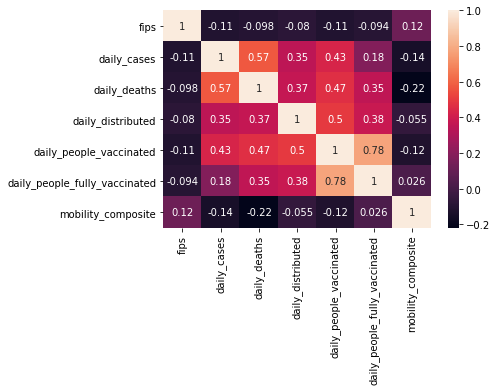

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
# daily death ,  daily people vacinated  , daily_distibuted  - > daily case 

In [24]:
df.columns

Index(['date', 'state', 'fips', 'daily_cases', 'daily_deaths',
       'daily_distributed', 'daily_people_vaccinated',
       'daily_people_fully_vaccinated', 'daily_vaccinations',
       'mobility_composite'],
      dtype='object')

In [25]:
df = df.drop(['date', 'state', 'fips',
       'daily_people_vaccinated',
       'daily_people_fully_vaccinated',
       'mobility_composite'], axis=1)

In [26]:
df.head()

,daily_cases,daily_deaths,daily_distributed,daily_vaccinations
0,594,28,80160.0,"26,935"
1,448,25,22170.0,"26,375"
2,865,52,40570.0,"25,376"
3,782,36,86610.0,"24,827"
4,524,38,60700.0,"24,118"


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [28]:
series = df.loc[df_gb_key[1],'daily_cases'].values

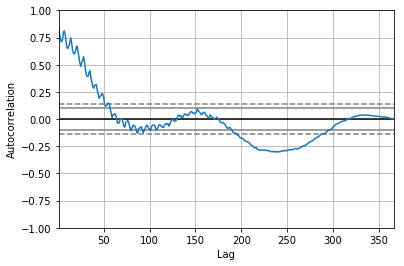

In [29]:
from pandas.plotting  import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


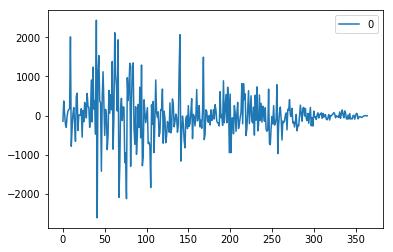

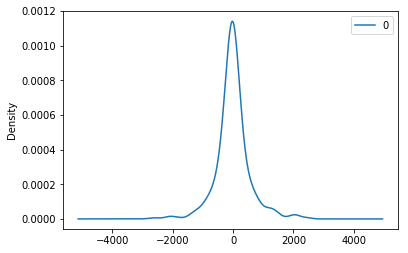

                 0
count   365.000000
mean     -0.178316
std     559.801272
min   -2610.034064
25%    -213.122681
50%     -11.870228
75%     180.770980
max    2432.387101


In [30]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Just select one not optimize yey

In [64]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

X = series # X -> daily cases
size = int(len(X) * 0.66) 
train, test = X[0:size], X[size:len(X)]
history = [float(x) for x in train]
predictions = []

In [65]:
print(len(test))

125


In [75]:
def Arima_MSE(train_history,test_history,pdq):

    for t in range(len(test_history)):
        #data_history = history.astype('float32')
        model = ARIMA(train_history, order= pdq)    #(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        #print(len(yhat))
        predictions.append(yhat)
        obs = test_history[t]
        train_history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    
    #print(len(test_history),len(predictions))    
    error = mean_squared_error(test_history, predictions)
    #print('Test MSE: %.3f' % error)
#     plt.plot(test)
#     plt.plot(predictions, color='red')
#     plt.show()
    
    return error , predictions

In [76]:
import warnings
import itertools
import gc
import numpy as np

In [77]:
type(test) , type(history)

(numpy.ndarray, list)

Best test MSE: 239924.428
best_param : (0, 0, 0)
Best test MSE: 144671.714
best_param : (0, 0, 1)
Best test MSE: 108299.352
best_param : (0, 0, 2)
Best test MSE: 95402.632
best_param : (0, 0, 3)
Best test MSE: 88449.012
best_param : (0, 0, 4)
Best test MSE: 81127.082
best_param : (0, 1, 1)
Best test MSE: 80468.032
best_param : (0, 1, 3)
Best test MSE: 77836.102
best_param : (1, 0, 1)
Best test MSE: 75781.949
best_param : (1, 1, 3)
Best test MSE: 75702.238
best_param : (1, 1, 4)
Best test MSE: 73403.809
best_param : (2, 0, 3)
Best test MSE: 72966.694
best_param : (2, 0, 4)
Best test MSE: 72343.751
best_param : (3, 0, 3)
Best test MSE: 71474.654
best_param : (3, 1, 4)
Best test MSE: 68697.357
best_param : (4, 0, 4)


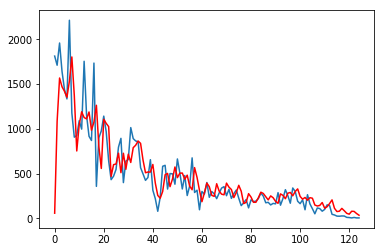

In [79]:
# Define the p, d and q parameters to take any value between 0 and 3
p = q = range(0, 5)
d = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
best_mse = np.inf
best_param = (0,0,0)
best_predict = []
for param in pdq:
    #print(param)
    predictions = []
    curr_mse , prediction = Arima_MSE(history,test,param)
    if curr_mse < best_mse:
        best_mse = curr_mse
        best_param = param
        print('Best test MSE: %.3f' % best_mse)
        print("best_param :",best_param)
        best_predict = prediction
       

plt.plot(test)
plt.plot(best_predict, color='red')
plt.show()                    

In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)